# 연습문제

In [1]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline
import platform

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'
import pandas as pd 
import seaborn as sns

data = pd.read_csv('data\@preprocessing_data_member01.csv')
data

,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문연도,최종주문월,최종주문일자,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일
0,0,100304734@n,1.0,0.000,0.000,0.0,1.000,0.000,1,103300,...,2019.0,5.0,9.0,Thursday,14.0,2019-05-09 00:00:00,2019.0,5.0,9.0,Thursday
1,1,1003409866@k,62.0,0.000,0.000,0.0,1.000,0.000,18,4303880,...,2019.0,5.0,28.0,Tuesday,16.0,2019-01-07 00:00:00,2019.0,1.0,7.0,Monday
2,2,100381931@n,5.0,0.000,0.000,0.0,0.000,1.000,3,71050,...,2019.0,2.0,10.0,Sunday,21.0,2018-10-31 00:00:00,2018.0,10.0,31.0,Wednesday
3,3,1004498382@k,1.0,0.000,0.000,0.0,1.000,0.000,1,76400,...,2019.0,1.0,9.0,Wednesday,12.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
4,4,1004547839@k,4.0,1.000,0.000,0.0,0.000,0.000,1,360800,...,2019.0,1.0,9.0,Wednesday,13.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4919,4931,zxvnm07,2.0,0.000,0.000,0.0,0.500,0.500,1,94380,...,2018.0,10.0,30.0,Tuesday,16.0,2018-10-30 00:00:00,2018.0,10.0,30.0,Tuesday
4920,4932,zxxz60,23.0,0.000,0.000,0.0,1.000,0.000,6,1341280,...,2019.0,5.0,23.0,Thursday,14.0,2019-03-29 00:00:00,2019.0,3.0,29.0,Friday
4921,4933,zzar2000,27.0,0.000,0.148,0.0,0.778,0.074,19,1534750,...,2019.0,5.0,27.0,Monday,7.0,2018-11-01 00:00:00,2018.0,11.0,1.0,Thursday
4922,4934,zzbbwmf,15.0,0.000,0.067,0.0,0.933,0.000,6,1160550,...,2019.0,4.0,30.0,Tuesday,17.0,2018-10-16 00:00:00,2018.0,10.0,16.0,Tuesday


In [2]:
data['주소']

0                               미확인
1         서울특별시 강남구 광평로51길 27 (수서동)
2            대구광역시 남구 대봉로 183 (이천동)
3         경기도 부천시 부천로476번길 46 (오정동)
4         전라남도 나주시 그린로 317-7 (빛가람동)
                   ...             
4919       충청남도 당진시 서부로 159-1 (채운동)
4920      경기도 화성시 동탄대로시범길 193 (청계동)
4921    경기도 용인시 기흥구 한보라1로 132 (공세동)
4922     부산광역시 사하구 감천로43번길 20 (감천동)
4923                    울산광역시 남구 달동
Name: 주소, Length: 4924, dtype: object

In [4]:
text = '서울특별시 강남구 광평로51길 27 (수서동)'

def extract_adress(data):
    result = data.split(' ')[0]
    return result

In [5]:
data['주소'].apply(extract_adress)

0       서울특별시
1       서울특별시
2       서울특별시
3       서울특별시
4       서울특별시
        ...  
4919    서울특별시
4920    서울특별시
4921    서울특별시
4922    서울특별시
4923    서울특별시
Name: 주소, Length: 4924, dtype: object

In [6]:
data['주소(시,도)'] = data['주소'].apply(lambda x: x.split(' ')[0])
data['주소(시,도)'] 

0         미확인
1       서울특별시
2       대구광역시
3         경기도
4        전라남도
        ...  
4919     충청남도
4920      경기도
4921      경기도
4922    부산광역시
4923    울산광역시
Name: 주소(시,도), Length: 4924, dtype: object

In [19]:
totalbenefit_adress = pd.pivot_table(data = data, index = '주소(시,도)', values = '총판매액')
totalbenefit_adress

,총판매액
"주소(시,도)",
강원도,496236.196078
경기도,576187.037445
경상남도,713341.580135
경상북도,633420.507937
광주광역시,763884.566929
대구광역시,670135.708155
대전광역시,818015.034965
미확인,137496.107383
부산광역시,713300.288660


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '미확인'),
  Text(1, 0, '서울특별시'),
  Text(2, 0, '대구광역시'),
  Text(3, 0, '경기도'),
  Text(4, 0, '전라남도'),
  Text(5, 0, '세종특별자치시'),
  Text(6, 0, '경상북도'),
  Text(7, 0, '강원도'),
  Text(8, 0, '울산광역시'),
  Text(9, 0, '충청북도'),
  Text(10, 0, '인천광역시'),
  Text(11, 0, '부산광역시'),
  Text(12, 0, '전라북도'),
  Text(13, 0, '대전광역시'),
  Text(14, 0, '충청남도'),
  Text(15, 0, '경상남도'),
  Text(16, 0, '광주광역시'),
  Text(17, 0, '제주특별자치도')])

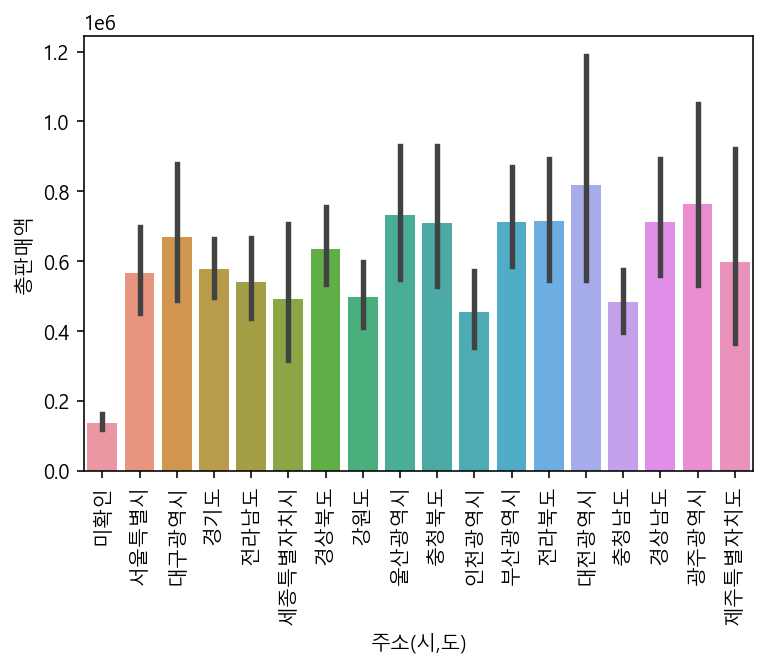

In [24]:
sns.barplot(data = data, x = '주소(시,도)', y = '총판매액')
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='총판매액', ylabel='Count'>

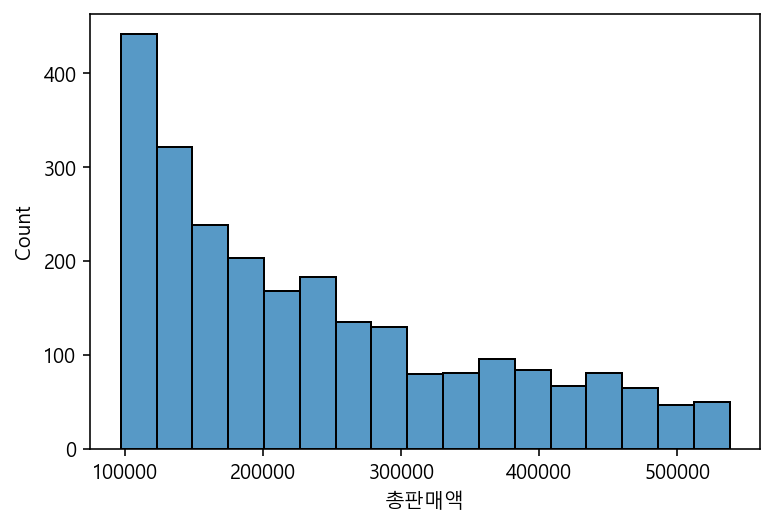

In [40]:
#9
q1 = data['총판매액'].describe()['25%']
q3 = data['총판매액'].describe()['75%']

ex9 = data[(q1 <= data['총판매액']) & (data['총판매액'] <= q3)]
sns.histplot(data = ex9, x = '총판매액')

In [33]:
#10
data['ID'].value_counts().sort_values()

100304734@n           1
1004547839@k          1
1004714862@k          1
10055065@n            1
1005540326292754@f    1
                     ..
zamppo2               1
zagm10                1
z016291               1
zuingong73            1
zzzxkxk91             1
Name: ID, Length: 4924, dtype: int64

<AxesSubplot:xlabel='총판매액', ylabel='총구매횟수'>

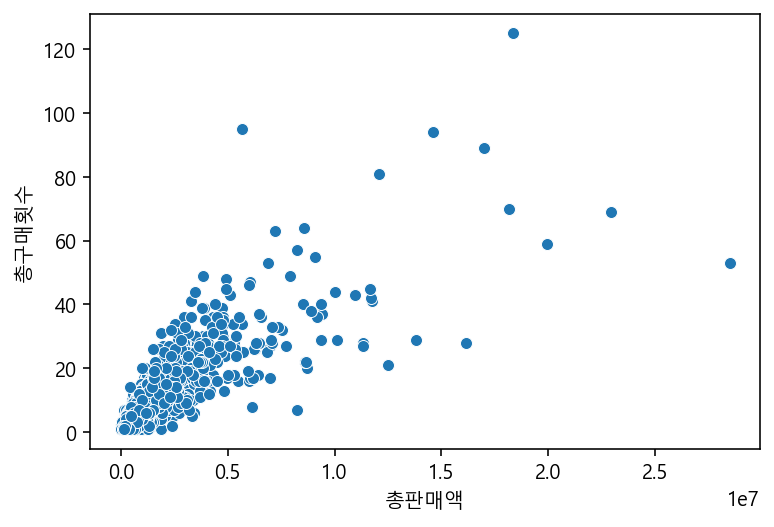

In [34]:
ex10 = data[['ID', '총판매액', '총구매횟수']]
sns.scatterplot(data = ex10, x = '총판매액', y = '총구매횟수')

# 데이터 결합하기

In [41]:
import pandas as pd
df1 = pd.read_csv('data/concat_1.csv')
df2 = pd.read_csv('data/concat_2.csv')
df3 = pd.read_csv('data/concat_3.csv')

In [42]:
df1.head()

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [43]:
df2.head()

,A,B,C,D
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [44]:
df3.head()

,A,B,C,D
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


In [52]:
row_concat = pd.concat([df1,df2,df3])
row_concat

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [53]:
row_concat.iloc[3,:]

A    a3
B    b3
C    c3
D    d3
Name: 3, dtype: object

In [54]:
row_concat.loc[3,:]

,A,B,C,D
3,a3,b3,c3,d3
3,a7,b7,c7,d7
3,a11,b11,c11,d11


In [56]:
new_row_series = pd.Series(['n1','n2','n3','n4'])
new_row_series

0    n1
1    n2
2    n3
3    n4
dtype: object

In [57]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [58]:
pd.concat([df1, new_row_series])

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
0,NaN,NaN,NaN,NaN,n1
1,NaN,NaN,NaN,NaN,n2
2,NaN,NaN,NaN,NaN,n3
3,NaN,NaN,NaN,NaN,n4


In [62]:
new_row_df = pd.DataFrame([['n1','n2','n3','n4']], columns = ['A','B','C','D'])
new_row_df

,A,B,C,D
0,n1,n2,n3,n4


In [63]:
pd.concat([df1, new_row_df])

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,n1,n2,n3,n4


In [64]:
pd.concat([df1, new_row_df], ignore_index = True)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,n1,n2,n3,n4


In [65]:
row_concat_i = pd.concat([df1,df2,df3], ignore_index = True)
row_concat_i

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [66]:
row_concat_i.iloc[4,:]

A    a4
B    b4
C    c4
D    d4
Name: 4, dtype: object

In [67]:
row_concat_i.loc[4,:]

A    a4
B    b4
C    c4
D    d4
Name: 4, dtype: object

In [68]:
col_concat = pd.concat([df1, df2, df3], axis = 1)
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [69]:
col_concat['A']

,A,A,A
0,a0,a4,a8
1,a1,a5,a9
2,a2,a6,a10
3,a3,a7,a11


In [70]:
#열방향으로 데이터를 추가하는 방법
col_concat['new_col_list'] = ['n1','n2', 'n3', 'n4']
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D,new_col_list
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8,n1
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9,n2
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10,n3
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11,n4


In [71]:
col_concat = pd.concat([df1, df2, df3], axis = 1, ignore_index = True)
col_concat

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [72]:
df1.columns = ['A', 'B', 'C', 'D']
df2.columns = ['E', 'F', 'G', 'H']
df3.columns = ['A', 'C', 'F', 'H']

In [74]:
row_concat = pd.concat([df1,df2,df3])
row_concat

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,a4,b4,c4,d4
1,NaN,NaN,NaN,NaN,a5,b5,c5,d5
2,NaN,NaN,NaN,NaN,a6,b6,c6,d6
3,NaN,NaN,NaN,NaN,a7,b7,c7,d7
0,a8,NaN,b8,NaN,NaN,c8,NaN,d8
1,a9,NaN,b9,NaN,NaN,c9,NaN,d9


In [77]:
pd.concat([df1,df3], join  = 'inner', ignore_index = True)

,A,C
0,a0,c0
1,a1,c1
2,a2,c2
3,a3,c3
4,a8,b8
5,a9,b9
6,a10,b10
7,a11,b11


# Merge 

In [83]:
person = pd.read_csv('data/survey_person.csv')
site = pd.read_csv('data/survey_site.csv')
survey = pd.read_csv('data/survey_survey.csv')
visited = pd.read_csv('data/survey_visited.csv')


In [84]:
person.head()

,ident,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [85]:
site.head()

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [86]:
survey.head()

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41


In [87]:
visited.head()

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26


In [92]:
site.head(1)

,name,lat,long
0,DR-1,-49.85,-128.57


In [93]:
# pd.merge(site, visited_subset)
visited_subset= visited.loc[[0,2,6],:]
o2o_merge = site.merge(visited_subset, left_on = 'name', right_on = 'site')
o2o_merge

#site 3
# visited_subset 3

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
2,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [95]:
m2o_merge = site.merge(visited, left_on = 'name', right_on = 'site')
m2o_merge

# site 3
# visited 8

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,844,DR-1,1932-03-22
3,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
4,DR-3,-47.15,-126.72,735,DR-3,1930-01-12
5,DR-3,-47.15,-126.72,751,DR-3,1930-02-26
6,DR-3,-47.15,-126.72,752,DR-3,NaN
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [96]:
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [102]:
#person과 survey를 merge 하세요
ps = person.merge(survey, left_on = 'ident', right_on = 'person')
ps

,ident,personal,family,taken,person,quant,reading
0,dyer,William,Dyer,619,dyer,rad,9.82
1,dyer,William,Dyer,619,dyer,sal,0.13
2,dyer,William,Dyer,622,dyer,rad,7.80
3,dyer,William,Dyer,622,dyer,sal,0.09
4,pb,Frank,Pabodie,734,pb,rad,8.41
5,pb,Frank,Pabodie,734,pb,temp,-21.50
6,pb,Frank,Pabodie,735,pb,rad,7.22
7,pb,Frank,Pabodie,751,pb,rad,4.35
8,pb,Frank,Pabodie,751,pb,temp,-18.50
9,lake,Anderson,Lake,734,lake,sal,0.05


In [103]:
# visited와 survey를 merge하세요
vs = visited.merge(survey, left_on = 'ident', right_on = 'taken')
vs


,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41
5,734,DR-3,1939-01-07,734,lake,sal,0.05
6,734,DR-3,1939-01-07,734,pb,temp,-21.50
7,735,DR-3,1930-01-12,735,pb,rad,7.22
8,735,DR-3,1930-01-12,735,NaN,sal,0.06
9,735,DR-3,1930-01-12,735,NaN,temp,-26.00


In [106]:
# 위에서 생성한 두 개의 데이터 프레임을 merge해보세요
ps.merge(vs, left_on = ['taken','person','quant','reading'], right_on = ['taken','person','quant','reading'])

,ident_x,personal,family,taken,person,quant,reading,ident_y,site,dated
0,dyer,William,Dyer,619,dyer,rad,9.82,619,DR-1,1927-02-08
1,dyer,William,Dyer,619,dyer,sal,0.13,619,DR-1,1927-02-08
2,dyer,William,Dyer,622,dyer,rad,7.80,622,DR-1,1927-02-10
3,dyer,William,Dyer,622,dyer,sal,0.09,622,DR-1,1927-02-10
4,pb,Frank,Pabodie,734,pb,rad,8.41,734,DR-3,1939-01-07
5,pb,Frank,Pabodie,734,pb,temp,-21.50,734,DR-3,1939-01-07
6,pb,Frank,Pabodie,735,pb,rad,7.22,735,DR-3,1930-01-12
7,pb,Frank,Pabodie,751,pb,rad,4.35,751,DR-3,1930-02-26
8,pb,Frank,Pabodie,751,pb,temp,-18.50,751,DR-3,1930-02-26
9,lake,Anderson,Lake,734,lake,sal,0.05,734,DR-3,1939-01-07


# 누락값 처리 

In [109]:
ebola = pd.read_csv('data/country_timeseries.csv')
ebola.count()

Date                   122
Day                    122
Cases_Guinea            93
Cases_Liberia           83
Cases_SierraLeone       87
Cases_Nigeria           38
Cases_Senegal           25
Cases_UnitedStates      18
Cases_Spain             16
Cases_Mali              12
Deaths_Guinea           92
Deaths_Liberia          81
Deaths_SierraLeone      87
Deaths_Nigeria          38
Deaths_Senegal          22
Deaths_UnitedStates     18
Deaths_Spain            16
Deaths_Mali             12
dtype: int64

In [112]:
row_count = ebola.shape[0]
null_count = row_count - ebola.count()
null_count

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [115]:
# dataframe null counting
ebola.isnull().sum()

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

# 누락값 처리하기 
* 다른값으로 대체한다. = fillna()
* 제거한다.

In [117]:
subset_ebola = ebola.iloc[0:10, 0:5]
subset_ebola.fillna(0)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,0.0,10030.0
1,1/4/2015,288,2775.0,0.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,0.0,8157.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,0.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,0.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [119]:
subset_ebola.fillna(method = 'bfill')

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,8166.0,10030.0
1,1/4/2015,288,2775.0,8166.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2730.0,8157.0,9633.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,7977.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7862.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


<AxesSubplot:xlabel='Day', ylabel='Cases_Guinea'>

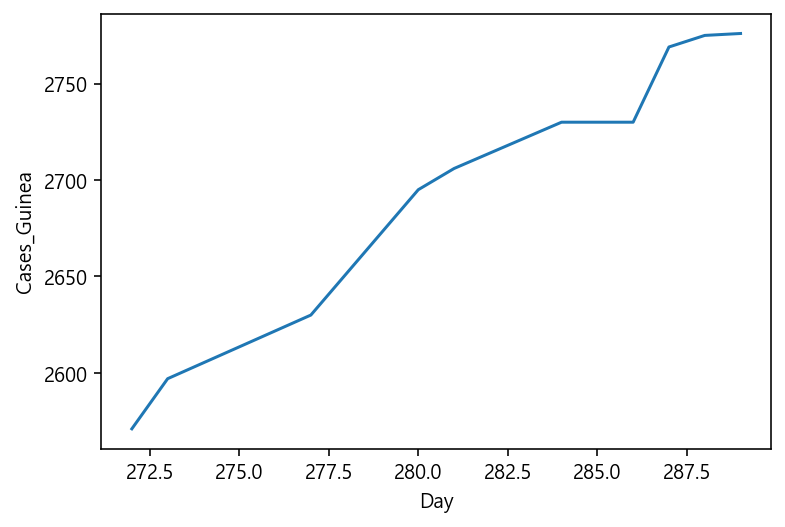

In [123]:
# method {‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None} 출처
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
sns.lineplot(data = subset_ebola.fillna(method = 'bfill'), x = 'Day', y = 'Cases_Guinea')

In [125]:
subset_ebola.fillna(method = 'ffill')

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2769.0,8157.0,9722.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,8018.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7977.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


<AxesSubplot:xlabel='Day', ylabel='Cases_Guinea'>

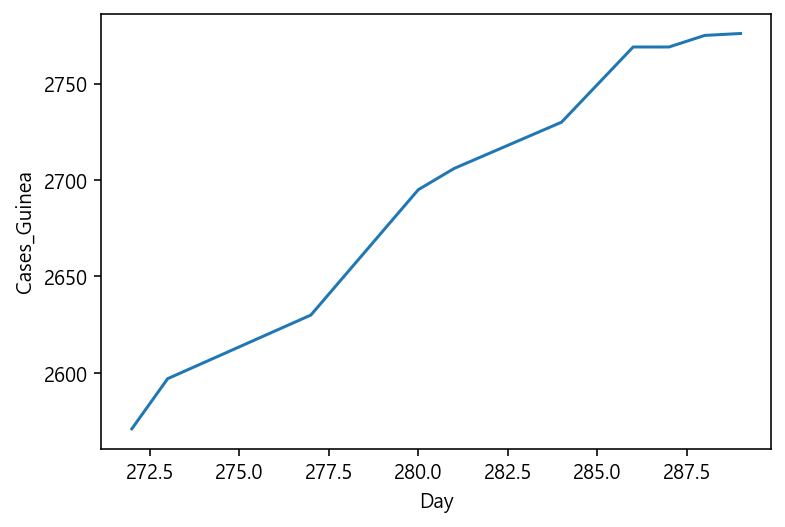

In [124]:
sns.lineplot(data = subset_ebola.fillna(method = 'ffill'), x = 'Day', y = 'Cases_Guinea')

In [120]:
subset_ebola.interpolate()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2749.5,8157.0,9677.5
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,7997.5,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7919.5,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


<AxesSubplot:xlabel='Day', ylabel='Cases_Guinea'>

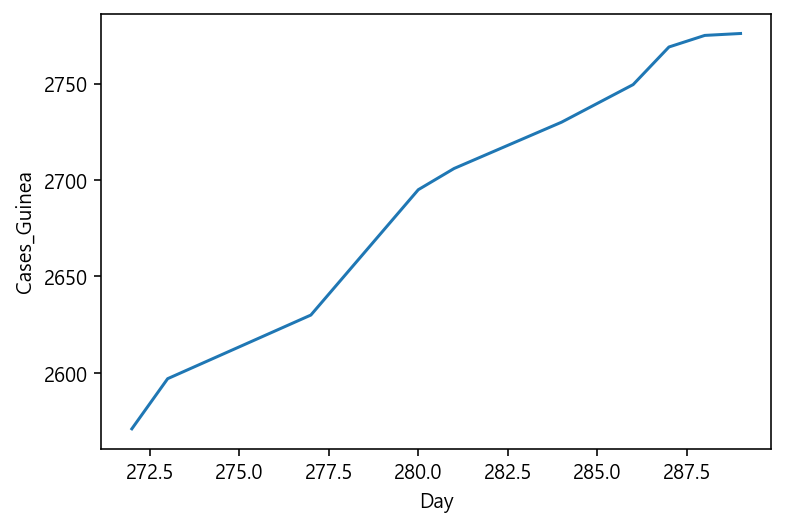

In [122]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html
sns.lineplot(data = subset_ebola.interpolate(), x = 'Day', y = 'Cases_Guinea')

# 누락값 삭제하기

In [126]:
ebola.dropna()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
19,11/18/2014,241,2047.0,7082.0,6190.0,20.0,1.0,4.0,1.0,6.0,1214.0,2963.0,1267.0,8.0,0.0,1.0,0.0,6.0


In [128]:
ebola.dropna(subset = ['Cases_Guinea'])

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
5,12/28/2014,281,2706.0,8018.0,9446.0,NaN,NaN,NaN,NaN,NaN,1708.0,3423.0,2758.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 누락값을 삭제하지 않으면?

In [129]:
ebola['Cases_mutiple'] = ebola['Cases_Guinea'] + ebola['Cases_Liberia'] + ebola['Cases_SierraLeone']
ebola[['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone', 'Cases_mutiple']]

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_mutiple
0,2776.0,NaN,10030.0,NaN
1,2775.0,NaN,9780.0,NaN
2,2769.0,8166.0,9722.0,20657.0
3,NaN,8157.0,NaN,NaN
4,2730.0,8115.0,9633.0,20478.0
...,...,...,...,...
117,103.0,8.0,6.0,117.0
118,86.0,NaN,NaN,NaN
119,86.0,NaN,NaN,NaN
120,86.0,NaN,NaN,NaN


# 실전데이터 분석 

## 쇼핑몰 데이터 분석 

In [132]:
import pandas as pd
customer_master = pd.read_csv('data/쇼핑몰데이터/customer_master.csv')
item_master = pd.read_csv('data/쇼핑몰데이터/item_master.csv')
transaction_1 = pd.read_csv('data/쇼핑몰데이터/transaction_1.csv')
transaction_2 = pd.read_csv('data/쇼핑몰데이터/transaction_2.csv')
transaction_detail_1 = pd.read_csv('data/쇼핑몰데이터/transaction_detail_1.csv')
transaction_detail_2 = pd.read_csv('data/쇼핑몰데이터/transaction_detail_2.csv')

In [133]:
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [134]:
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [135]:
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [142]:
transaction_1.tail()

,transaction_id,price,payment_date,customer_id
4995,T0000005108,210000,2019-06-15 02:42:41,HD315748
4996,T0000005109,150000,2019-06-15 03:36:16,HI215420
4997,T0000005110,50000,2019-06-15 03:44:06,IK880102
4998,T0000005111,210000,2019-06-15 04:14:06,IK074758
4999,T0000005112,50000,2019-06-15 04:42:38,HD444151


In [136]:
transaction_2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [140]:
transaction = pd.concat([transaction_1,transaction_2], ignore_index = True)
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))
transaction

5000
1786
6786


,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
6781,T0000006894,180000,2019-07-31 21:20:44,HI400734
6782,T0000006895,85000,2019-07-31 21:52:48,AS339451
6783,T0000006896,100000,2019-07-31 23:35:25,OA027325
6784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [137]:
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [141]:
transaction_detail_1.tail()

,detail_id,transaction_id,item_id,quantity
4995,4995,T0000004865,S003,1
4996,4996,T0000004866,S001,3
4997,4997,T0000004867,S001,3
4998,4998,T0000004868,S005,1
4999,4999,T0000004869,S003,1


In [138]:
transaction_detail_2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


In [143]:
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index = True)
print(len(transaction_detail_1))
print(len(transaction_detail_2))
print(len(transaction_detail))
transaction_detail

5000
2144
7144


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
7139,7139,T0000006894,S004,1
7140,7140,T0000006895,S002,1
7141,7141,T0000006896,S001,2
7142,7142,T0000006897,S002,1


In [144]:
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [145]:
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [159]:
Transac_merge = transaction.drop(['price'], axis = 1).merge(transaction_detail, on = 'transaction_id', how = 'left')
# 칼럼명이 왼쪽 오른쪽 같을 땐 그냥 on을 쓴다
Transac_merge.head()

,transaction_id,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,2019-02-01 04:33:46,PL542865,4,S002,2


In [153]:
# Transac_merge, item_master, customer_master 결합
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [158]:
Transac_item_merge = Transac_merge.merge(item_master, on = 'item_id', how = 'left')
Transac_item_merge.head()

,transaction_id,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price
0,T0000000113,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000
1,T0000000114,2019-02-01 01:37:23,HD678019,1,S001,1,PC-A,50000
2,T0000000115,2019-02-01 02:34:19,HD298120,2,S003,1,PC-C,120000
3,T0000000116,2019-02-01 02:47:23,IK452215,3,S005,1,PC-E,210000
4,T0000000117,2019-02-01 04:33:46,PL542865,4,S002,2,PC-B,85000


In [155]:
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [157]:
Transac_item_customer_merge = Transac_item_merge.merge(customer_master, on = 'customer_id', how = 'left')
Transac_item_customer_merge.head()

,transaction_id,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref
0,T0000000113,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
1,T0000000114,2019-02-01 01:37:23,HD678019,1,S001,1,PC-A,50000,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시
2,T0000000115,2019-02-01 02:34:19,HD298120,2,S003,1,PC-C,120000,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시
3,T0000000116,2019-02-01 02:47:23,IK452215,3,S005,1,PC-E,210000,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시
4,T0000000117,2019-02-01 04:33:46,PL542865,4,S002,2,PC-B,85000,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시


In [161]:
Transac_item_customer_merge['total_price'] = Transac_item_customer_merge['quantity'] * Transac_item_customer_merge['item_price']
print(Transac_item_customer_merge['total_price'].sum())
print(transaction['price'].sum())

971135000
971135000


In [163]:
Transac_item_customer_merge.head(1)

,transaction_id,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref,total_price
0,T0000000113,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,210000


In [165]:
Transac_item_customer_merge.isnull().sum()

transaction_id       0
payment_date         0
customer_id          0
detail_id            0
item_id              0
quantity             0
item_name            0
item_price           0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
total_price          0
dtype: int64

In [167]:
Transac_item_customer_merge.describe()

,detail_id,quantity,item_price,age,total_price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,121698.628219,50.265677,135937.150056
std,2062.439494,0.513647,64571.311830,17.190314,68511.453297
min,0.000000,1.000000,50000.000000,20.000000,50000.000000
25%,1785.750000,1.000000,50000.000000,36.000000,85000.000000
50%,3571.500000,1.000000,102500.000000,50.000000,120000.000000
75%,5357.250000,1.000000,187500.000000,65.000000,210000.000000
max,7143.000000,4.000000,210000.000000,80.000000,420000.000000


In [168]:
Transac_item_customer_merge['payment_date'] = pd.to_datetime(Transac_item_customer_merge['payment_date'])

In [170]:
Transac_item_customer_merge['day'] = Transac_item_customer_merge['payment_date'].dt.strftime('%Y-%m-%d')

<AxesSubplot:xlabel='day', ylabel='sum_price'>

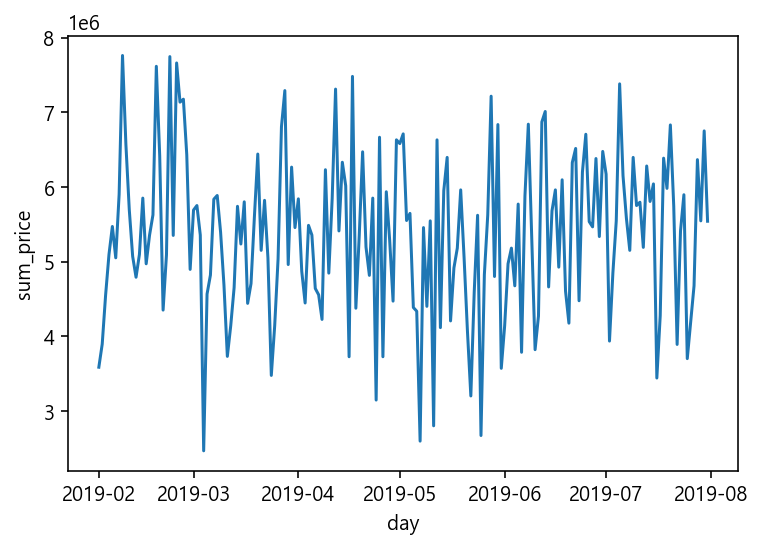

In [172]:
day_sum_price = Transac_item_customer_merge.groupby('day', as_index = False).agg(sum_price = ('total_price', 'sum'))
day_sum_price['day'] = pd.to_datetime(day_sum_price['day'])
sns.lineplot(data = day_sum_price, x = 'day', y = 'sum_price')

In [173]:
# (1)payment_date를 활용하여 payment_month(%Y%m) 칼럼을 생성하라
# (2) (1)에서 생성한 payment_month를 활용하여 월별 매출의 총합을 계산하라.
# (3) payment_month를 datetime 자료형으로 수정하고 (2)에서 생성한 DataFrame을 활용하여 lineplot을 그려라

<AxesSubplot:xlabel='month', ylabel='sum_price_month'>

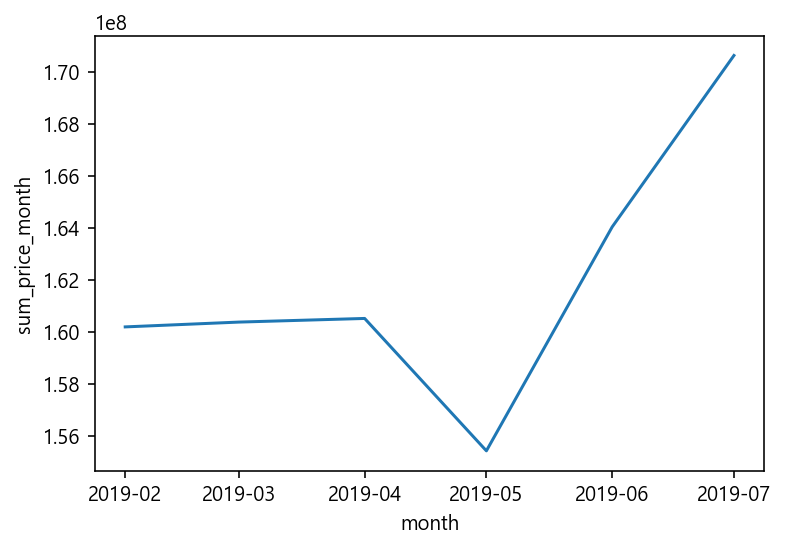

In [174]:
Transac_item_customer_merge['payment_date'] = pd.to_datetime(Transac_item_customer_merge['payment_date'])
Transac_item_customer_merge['month'] = Transac_item_customer_merge['payment_date'].dt.strftime('%Y-%m')
month_sum_price = Transac_item_customer_merge.groupby('month', as_index = False).agg(sum_price_month = ('total_price', 'sum'))
month_sum_price['month'] = pd.to_datetime(month_sum_price['month'])
sns.lineplot(data = month_sum_price, x = 'month', y = 'sum_price_month')

In [179]:
# 성별에 따른 매출 총합을 비교하고 어떤 성별이 매출이 더 높은지 구해보세요.
Transac_item_customer_merge.groupby('gender', as_index = False).agg(gen_price = ('total_price', 'sum'))

,gender,gen_price
0,F,481045000
1,M,490090000


In [180]:
#태어난 년도(birth) 별 매출을 구해보세요.
Transac_item_customer_merge.head(1)

,transaction_id,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref,total_price,day,month
0,T0000000113,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,210000,2019-02-01,2019-02


In [181]:
Transac_item_customer_merge['birth'] = pd.to_datetime(Transac_item_customer_merge['birth'])
Transac_item_customer_merge['birth_year'] = Transac_item_customer_merge['birth'].dt.strftime('%Y')
Transac_item_customer_merge.groupby('birth_year', as_index = False).agg(birth_year_price = ('total_price', 'sum'))

,birth_year,birth_year_price
0,1938,4405000
1,1939,15300000
2,1940,10225000
3,1941,12270000
4,1942,14515000
...,...,...
57,1995,13750000
58,1996,16085000
59,1997,11935000
60,1998,16705000


In [182]:
Transac_item_customer_merge.head(1)

,transaction_id,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref,total_price,day,month,birth_year
0,T0000000113,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,210000,2019-02-01,2019-02,1989


In [ ]:
#구입월에 따른 상품별 매출
Transac_item_customer_merge([])